# Subproject 1 – Used Car Prices Prediction
Fasegun Babatunde Oyeniyi (a91647)

Machine Learning – M.Sc. in Electrical and Computer Engineering, ISE,
University of Algrave, Faro, Portugal


# Introduction

This project solves a supervised regression problem by forecasting used cars prices based on vehicle features. The dataset includes a combination of numerical and high-cardinality categorical variables, demanding thorough exploratory data analysis and preprocessing. Several baseline and adjusted machine learning models are tested using cross-validation and RMSE to analyze performance, generalization, and the impact of model complexity.


Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

Reading datasets files and making dataframes for the train and test data using read_csv() method from pandas library

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA)

This will let us understand the kind of data we are working with.
It will let us understand the kind of features that are present in the Data, if they are categorical or numerical features. If there are missing values in the data, and the type (if any), this make us have better decision on methods we can use to fill up the values that are missing. Understanding this will let us have better choice on data peprocessing, feature enginerring to apply, models to use for training, cross validation technique and hyperparameters for grid search.

The shape property from pandas library will give the dimension (row x columns) of the data i am working with.

In [3]:
# for train data

df_train.shape

(188533, 13)

In [4]:
# for test data

df_test.shape

(125690, 12)

the head() method shows first 5 rows of data, "n" can be passed as an argument, if we want specific amount of row to be shown,passing n as an argument here will show the first n rows from index (0 to n-1).

In [5]:
# for train data

df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
# for test data

df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


info() method gives the summary details about the dataframes like the index, datatypes, columns, non-null values and the memory usage.Ths method also shows the total numbers of values for each of the columns present in the datasets.

In [7]:
#  for the train data

df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            188533 non-null  int64
 1   brand         188533 non-null  str  
 2   model         188533 non-null  str  
 3   model_year    188533 non-null  int64
 4   milage        188533 non-null  int64
 5   fuel_type     183450 non-null  str  
 6   engine        188533 non-null  str  
 7   transmission  188533 non-null  str  
 8   ext_col       188533 non-null  str  
 9   int_col       188533 non-null  str  
 10  accident      186081 non-null  str  
 11  clean_title   167114 non-null  str  
 12  price         188533 non-null  int64
dtypes: int64(4), str(9)
memory usage: 39.4 MB


In [8]:
#  for the test data

df_test.info()

<class 'pandas.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            125690 non-null  int64
 1   brand         125690 non-null  str  
 2   model         125690 non-null  str  
 3   model_year    125690 non-null  int64
 4   milage        125690 non-null  int64
 5   fuel_type     122307 non-null  str  
 6   engine        125690 non-null  str  
 7   transmission  125690 non-null  str  
 8   ext_col       125690 non-null  str  
 9   int_col       125690 non-null  str  
 10  accident      124058 non-null  str  
 11  clean_title   111451 non-null  str  
dtypes: int64(3), str(9)
memory usage: 25.3 MB


## Target visualization

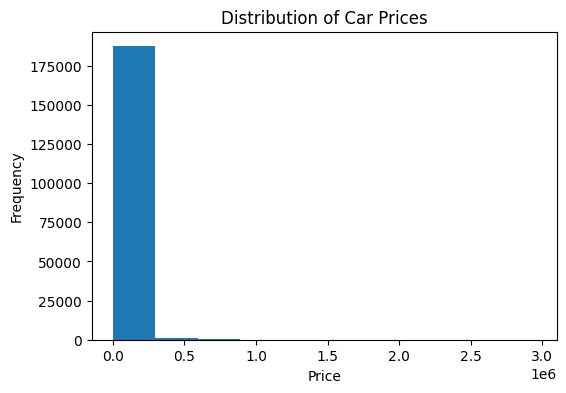

In [9]:
# from the price distribution plot below, it is noticed that the target ['price'] of the train data is skewed with fewer high-priced car.

# The target distribution was analyzed to identify skewness and outliers in used car prices, which directly affects model choice and potential target transformations.

# Due to the skewness from the target, we can make use of log transform, beacuse it compreses the high-price tail and also affect the proportionality of the errors.

# price distrubution  visualization
plt.figure(figsize=(6,4))
plt.hist(df_train["price"])
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Outliers can disproportionately affect linear models and increase RMSE. This motivates later log transformation of the target variable.

## separating numerical column and categorical column

this part shows the numerical columns and categorical features columns we have, this lets us understand if there will be need for data encoding or not.

In [10]:
#  for train data

numerical_columns = df_train.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df_test.select_dtypes(include=["object", "bool", "category"]).columns


/tmp/ipykernel_30409/1863438640.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_columns = df_test.select_dtypes(include=["object", "bool", "category"]).columns


## Missing values

the pandas library provides isnull() to check the column with missing values, sum() will give the total sum of the missing values if any exist,  and the sort_values() for sorting either in ascending or descending order.

In [11]:
# from pandas dataframe, we can use the .mean() method to find the mean for the each colums with missing values, then convert it to percentage multiplying be 100.

#  Missing value analysis was performed to quantify data incompleteness and justify the imputation strategies applied during preprocessing.

#  for train data
train_missing_values =df_train.isnull().sum().sort_values(ascending=False)
train_missing_columns = df_train.columns[df_train.isna().any()].tolist()

train_missing_percentage = df_train.isnull().mean().sort_values(ascending=False) * 100

train_missing_columns

['fuel_type', 'accident', 'clean_title']

In [12]:
#for test data

df_test.isnull().sum().sort_values(ascending=False)

train_missing_percentage[train_missing_percentage > 0]

clean_title    11.360876
fuel_type       2.696080
accident        1.300568
dtype: float64

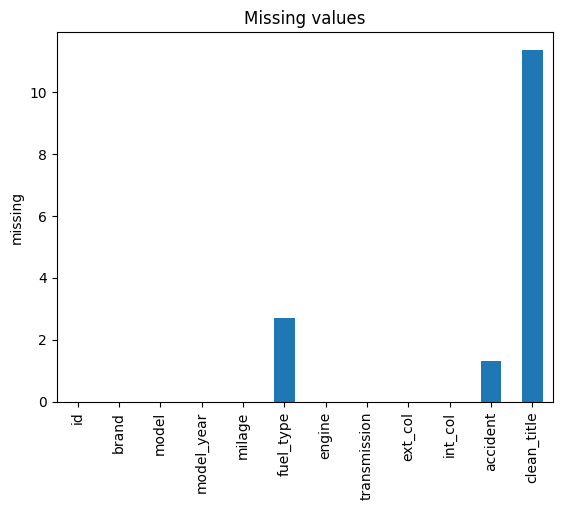

In [13]:
# the plot for columns with missing data
(df_train.drop(['price'], axis=1).isnull().mean() * 100).plot(kind="bar")
plt.title("Missing values")
plt.ylabel("missing")
plt.show()


As seen, the dataset contain some missing values which will need to be fill before moving to the modelling.

# Data preprocessing

Preprocessing included imputing missing categorical values with training statistics, encoding categorical variables with one-hot encoding, and applying a log transformation to the target variable to reduce skewness and outliers.

## Filling missing data

From using info() method when doing EDA above on the train data, It was seen that there were some missing values. Like in the fuel_type, accident and the clean_title features. This missing values are categorical features, therefore there is need to fill the the missing values before training because model can not be trained with NaNs columns.

Missing categorical values are filled using the mode calculated from the training set and consistently applied to the test set. This ensures that feature distributions are consistent throughout training and testing data.

In [14]:
# For replacing the missing values in the training set, i used the mode() function from pandas to get the mode and using fillna() function from pandas library  to fill the positions where there was a misiing values.

for column in train_missing_columns:
    #  calculates the mode of the values.
    replace_value = df_train[column].mode()[0]

    # then filled it to the missing values position.
    df_train[column] = df_train[column].fillna(replace_value)

# For the test set, only missing values for columns that are present in the train data set and excluding 'price was filled'.
# Doing this bring cosistency and more accuracy when training. As we are dealing with unseen data, we can't be sure if the unseen data will have additional column or not, or if they will contain some missing data, so it is best to take care of that.

#  this line will select only the column with missing data in test data that are also present in the train data
missing_columns_test = [col for col in train_missing_columns if col in df_test.columns]

for column in missing_columns_test:
    # Use the mode calculated from the training set for consistency
    replace_value = df_train[column].mode()[0]
    df_test[column] = df_test[column].fillna(replace_value)


In [15]:
#confirming if the missing data was successfully filled

df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            188533 non-null  int64
 1   brand         188533 non-null  str  
 2   model         188533 non-null  str  
 3   model_year    188533 non-null  int64
 4   milage        188533 non-null  int64
 5   fuel_type     188533 non-null  str  
 6   engine        188533 non-null  str  
 7   transmission  188533 non-null  str  
 8   ext_col       188533 non-null  str  
 9   int_col       188533 non-null  str  
 10  accident      188533 non-null  str  
 11  clean_title   188533 non-null  str  
 12  price         188533 non-null  int64
dtypes: int64(4), str(9)
memory usage: 39.5 MB


In [16]:
df_test.info()

<class 'pandas.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            125690 non-null  int64
 1   brand         125690 non-null  str  
 2   model         125690 non-null  str  
 3   model_year    125690 non-null  int64
 4   milage        125690 non-null  int64
 5   fuel_type     125690 non-null  str  
 6   engine        125690 non-null  str  
 7   transmission  125690 non-null  str  
 8   ext_col       125690 non-null  str  
 9   int_col       125690 non-null  str  
 10  accident      125690 non-null  str  
 11  clean_title   125690 non-null  str  
dtypes: int64(3), str(9)
memory usage: 25.4 MB


## Encoding Categorical Features

The pd.get_dummies() function uses one-hot encoding to transform categorical data to numerical binary features. but its high dimensionality may lead to overfitting and encourages regularization.

In [17]:
df_train_encoded = pd.get_dummies(df_train, drop_first=True)

df_test_encoded = pd.get_dummies(df_test, drop_first=True)
df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.drop(['price'], axis=1).columns, fill_value=0)

This gives the statistical description of the train dataframe after encoding.

In [18]:
df_train_encoded.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [19]:
df_train_encoded.head()

,id,model_year,milage,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported
0,0,2007,213000,4200,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,2002,143250,4999,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2002,136731,13900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,2017,19500,45000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,2021,7388,97500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Numerical Categories plot

The plot for the train dataframe, shows that the manitude in the features are not well balanced.

<Axes: >

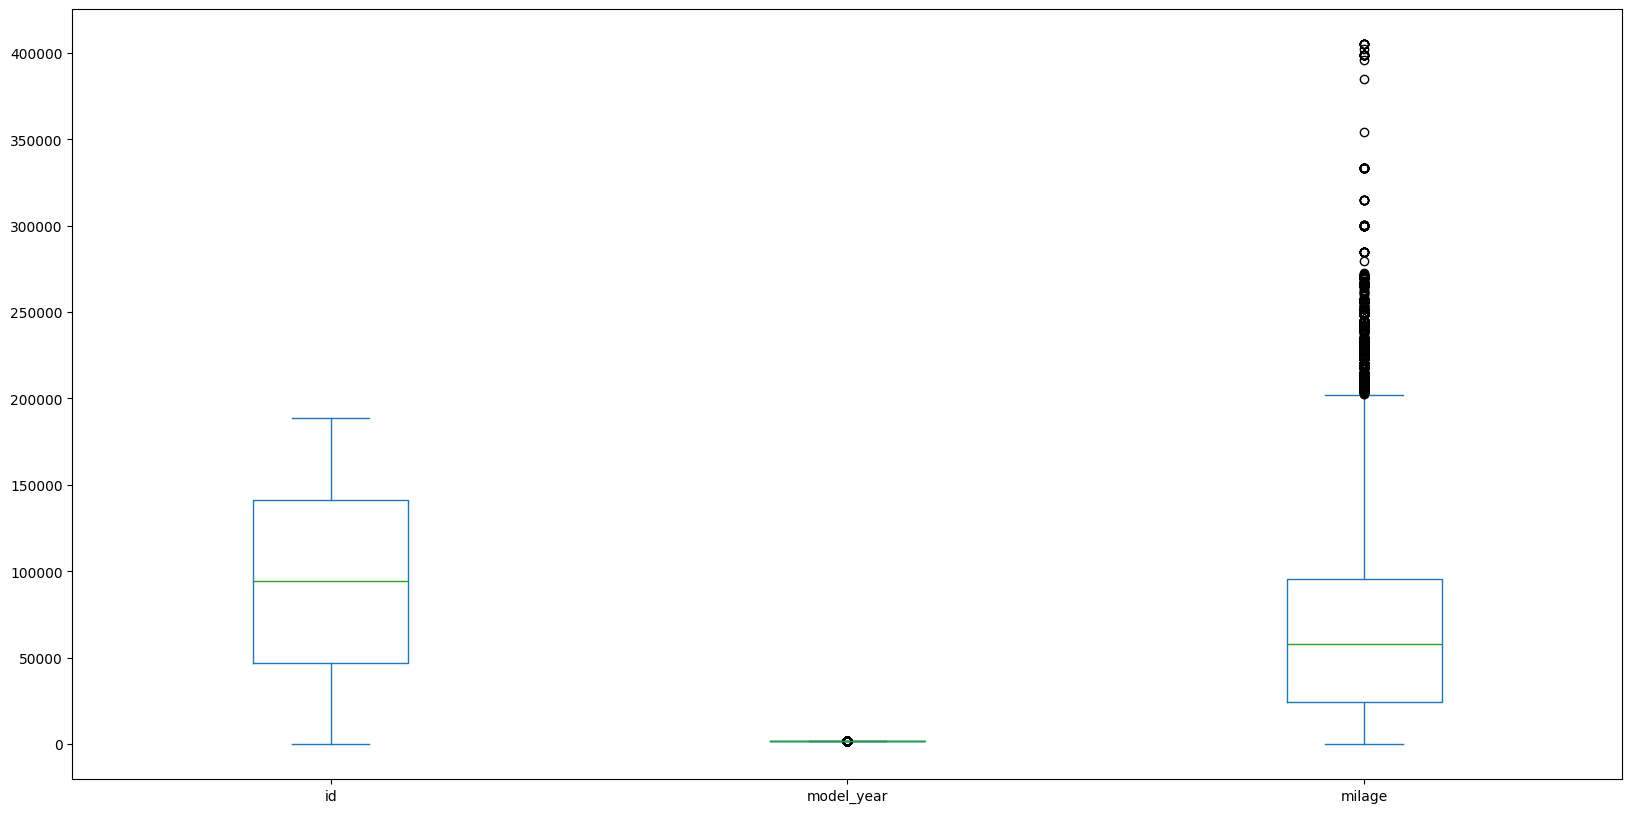

In [20]:
df_train_encoded.drop(['price'], axis=1).plot(kind='box', figsize=(20,10))

This Boxplots highlight numerical features extreme values. The mileage shows strong outliers. Tree‑based models like (decision tree , randomforest tree) are robust to these outliers, while linearRegressor and k-NN are more sensitive.

# Model Training

## Base Model

Before appling advanced method like gridsearch and cross validation for hyperparameter tuning for better prediction, first baseline models will be implemented to establish reference.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

The cell below contain 2 function, the getXy() get the features (X) and the y(target) from the data, the second function run_base_model() takes in dataframe object, then separate to X and y split, this function also splits the data into train sets and test sets for base model use.

In [22]:
def getXy(df):
    X = df.drop(['price'], axis=1)
    y = df['price']

    return X,y

def run_base_models(df):
    X,y = getXy(df)
    # split the Dataframe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, shuffle=True)

    #  basemodels to use
    base_models = {
    "Linear regression": LinearRegression(),
    "k-NN": KNeighborsRegressor(n_neighbors=3),
    "Decision tree": DecisionTreeRegressor(max_depth=50),
    "Random Forest": RandomForestRegressor(max_depth=50)
    }

    base_model_scores ={}

    for idx, (name, model) in enumerate(base_models.items()):
        fig,ax = plt.subplots(figsize=(20,10))

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        pred = model.predict(X_test)

        # i used numpy to compute each base model rmse value
        rmse = np.sqrt(mean_squared_error(y_test, pred))

        print(f'{name}: score = {score}')

         # plot pred vs actual
        ax.scatter(y_test, pred, c='g', marker='o', linestyle='None')
        ax.plot(y_test, y_test, c='r')
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
        ax.set_title(f'{name} / Score =  {score}/ RMSE = {rmse}')

        base_model_scores[name] = {"rmse": rmse}

    return base_model_scores

Linear regression: score = 0.13610773205572724
k-NN: score = -0.23131782326478856
Decision tree: score = -0.7037537134990011
Random Forest: score = -0.02196921531006213


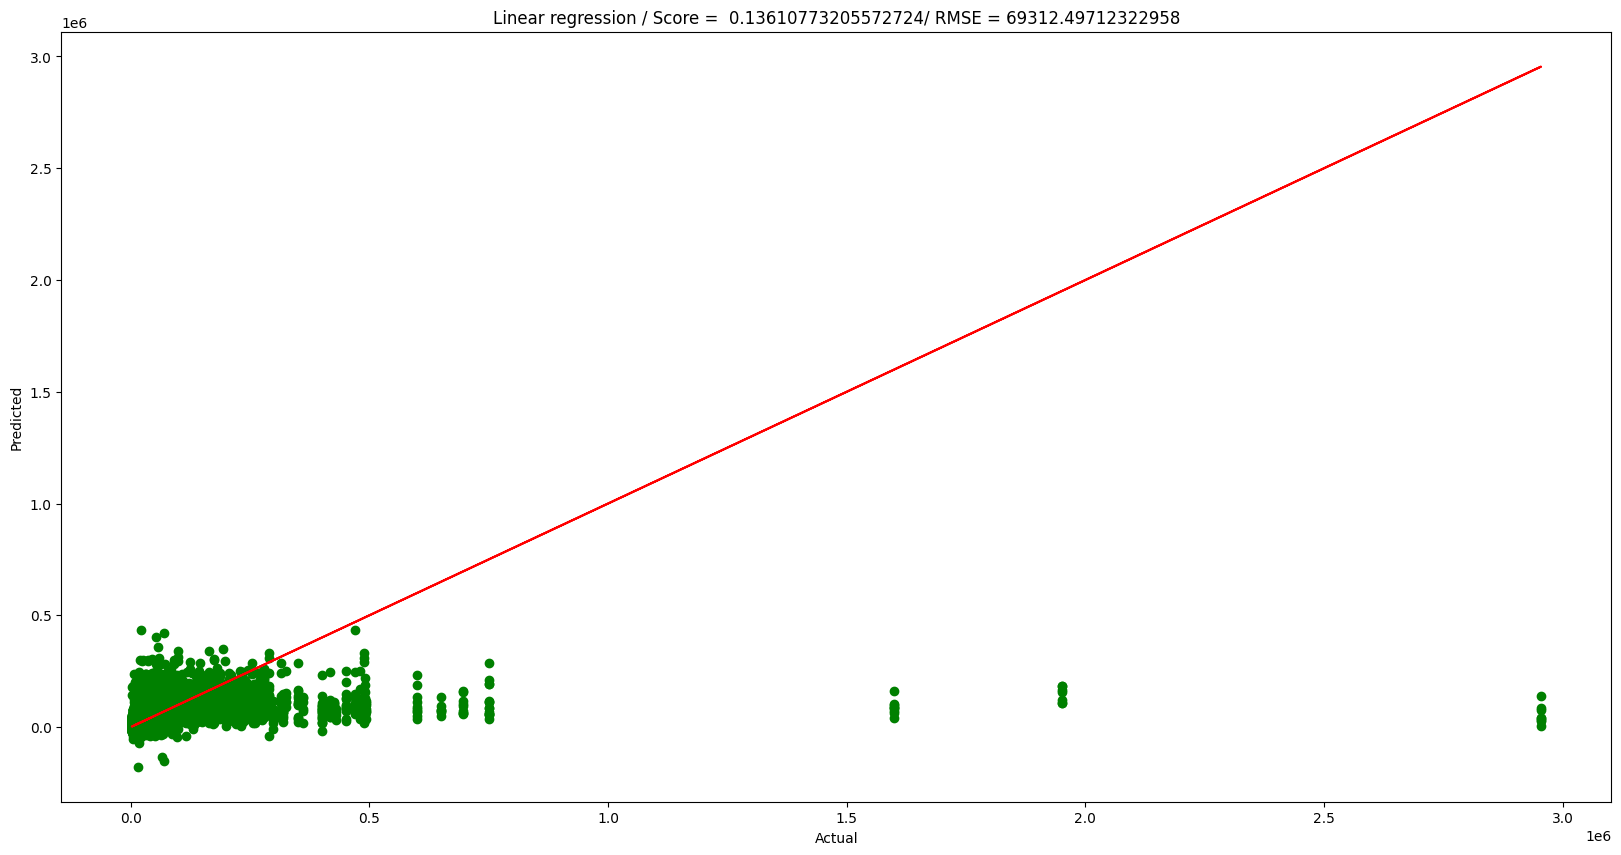

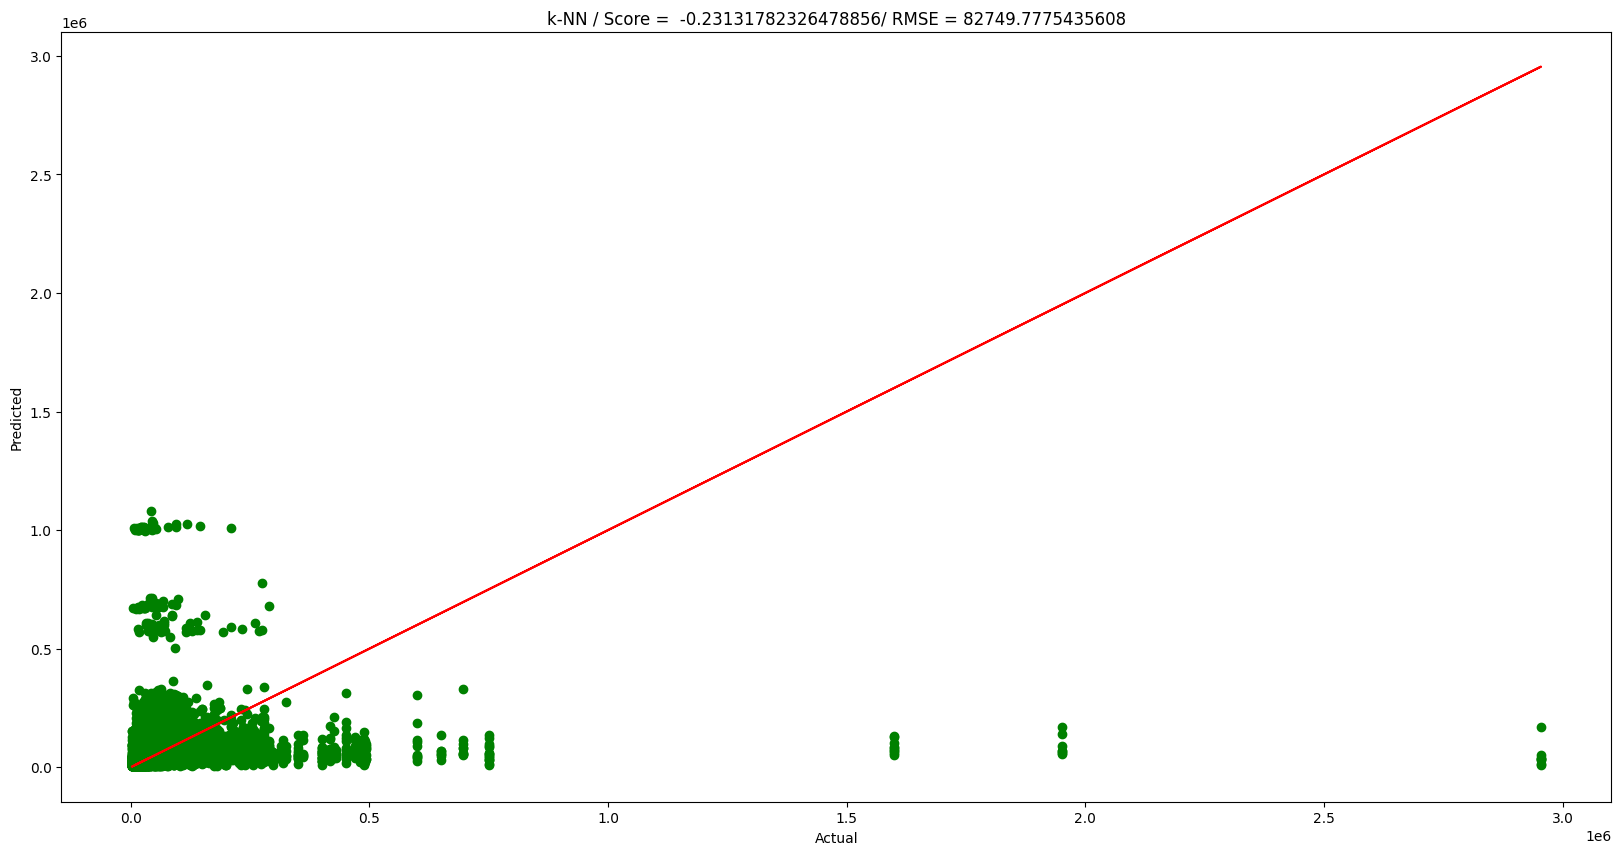

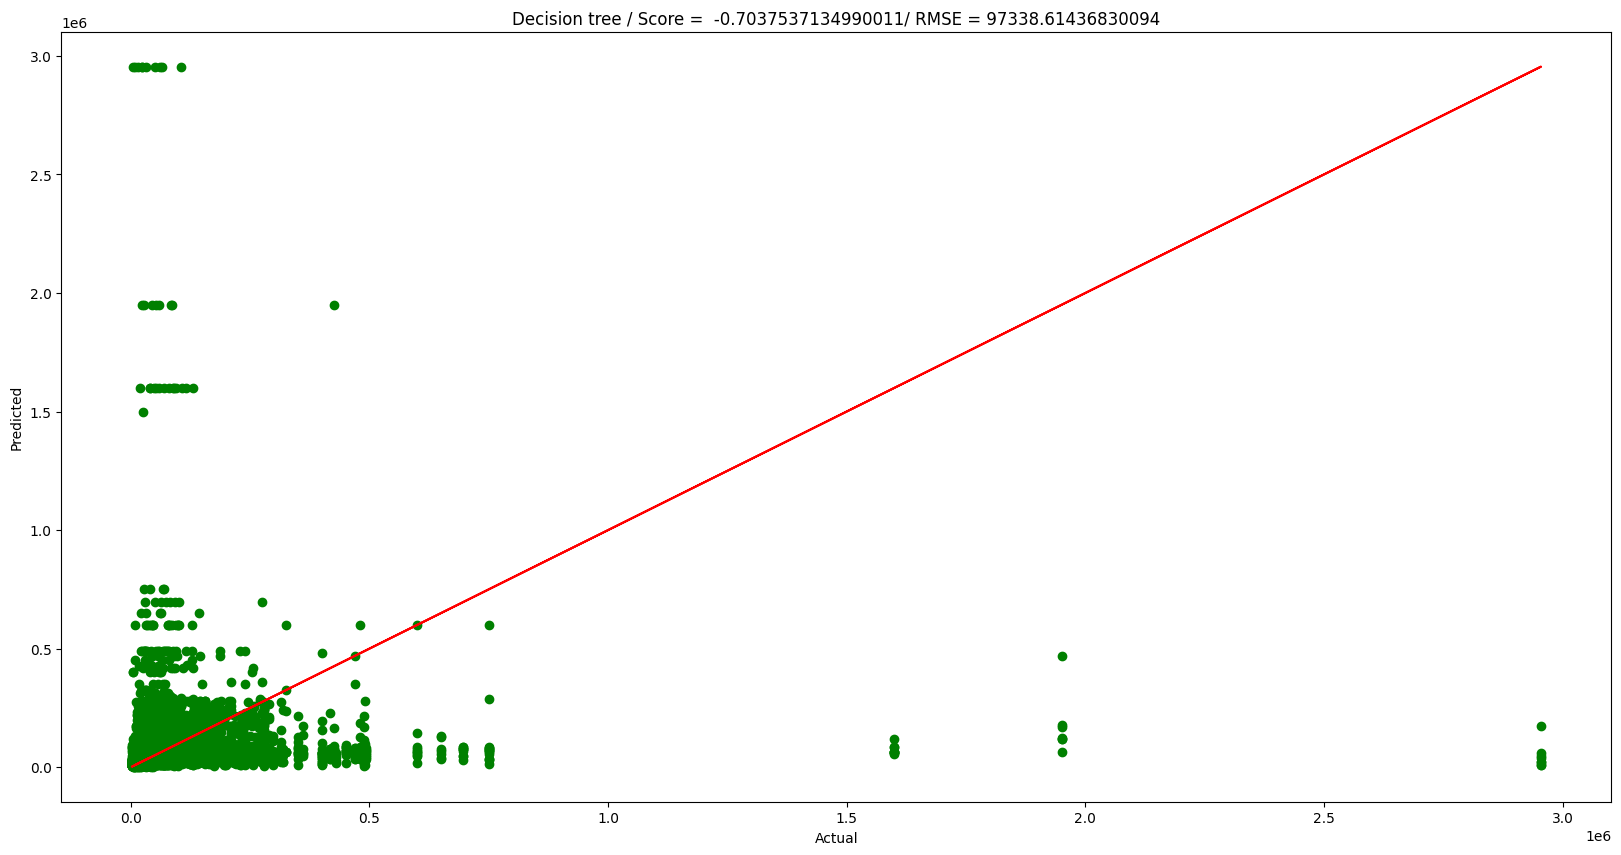

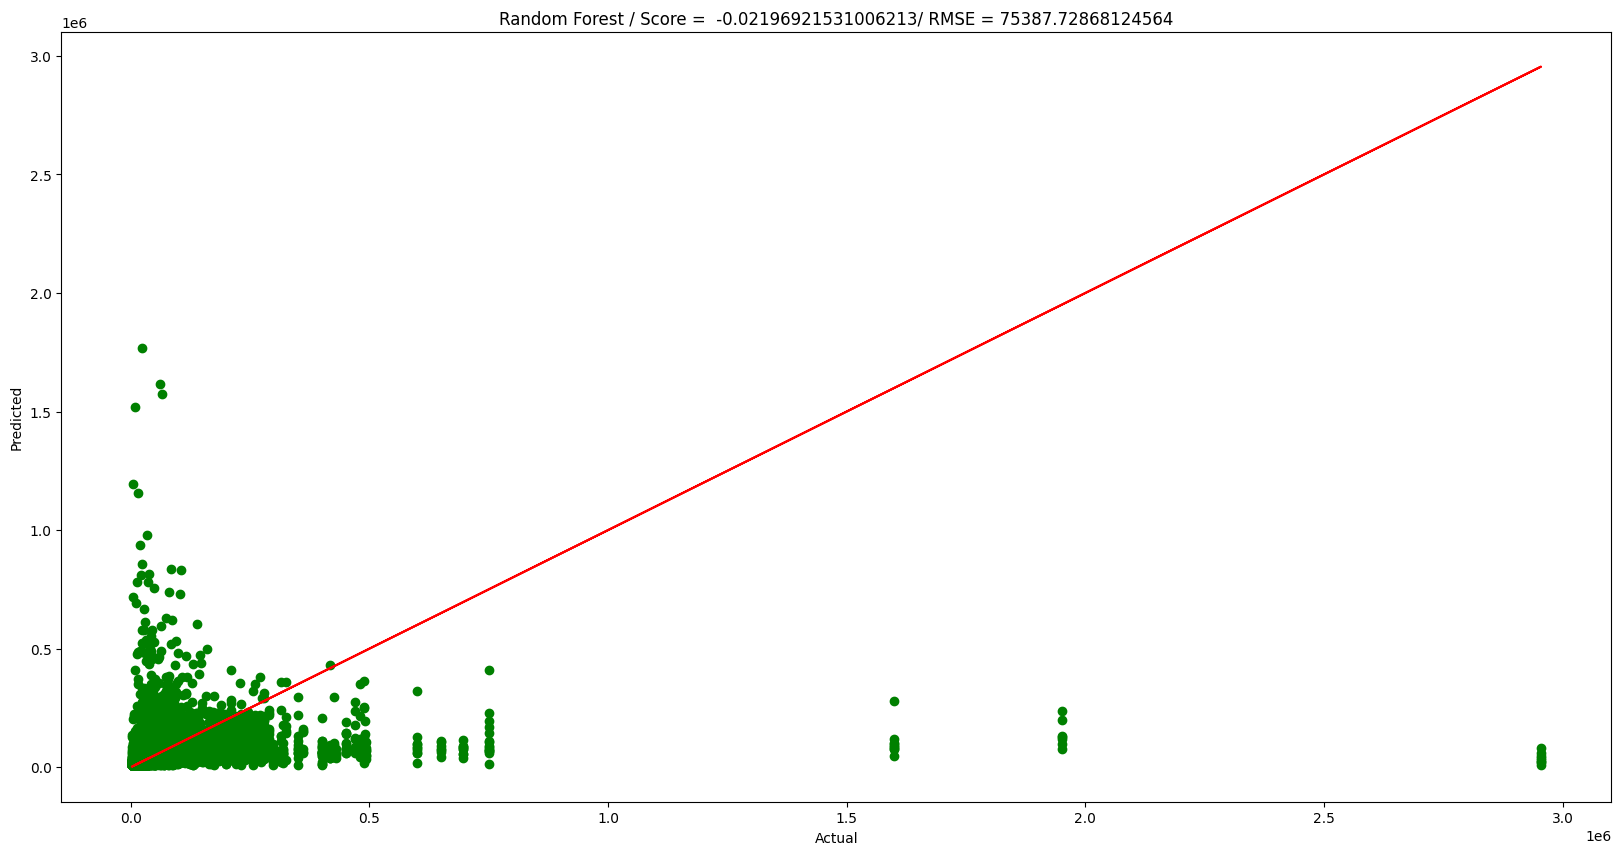

In [23]:
models_scores = pd.DataFrame()
models_scores['Base Models'] = run_base_models(df_train_encoded)

From the plots: All base models are underfitted due to wide prediction spread. k‑NN struggles due to high dimensionality. Random Forest serves as a strong baseline, while Linear Regression is a simple baseline. Ouliers are splited poorly which made soe models to give negative score.

## Features Engineering

As a result of the result from the base models plots, also by making reference to the target distribution plot from the EDA part, the skewness of the target resulted in the underfiting of those base models. It was clearly seen that the price is not well distributed and this can result in bad prediction of the training models.  

To adjust the distribution of price, handle the ouliers. Log transformation is done on the target ['price']. Apllying this will stabilize the variance in regression, also minimizes errors that can result in improvements on training algorithms

**Log transform of the target**

In [24]:
delta = 1
X, y = getXy(df_train_encoded)
y_log = np.log(y+delta)

Splitting of encoded features and log transformed data into train sets and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=.20, random_state=42, shuffle=True)

## GridSearch and Cross Validation Tunning

Training the models with tuned hyperparameters of the models using GridSearchCV

In the cell below, results is an empty array which will save the result fromeach of the models, the best_model objects save model with the best parammeters used durring grid search before being used for cross validation.

KFold cross validation is being used with n_split = 3. For faster execution of the grid search, some part of the samples were taken to be used by gridsearch for hyperparameter tunning to be used for cross validation while all the model with full data was used to train the model. 

In [26]:
from sklearn.model_selection import GridSearchCV, KFold

results = []
best_models = {}

tune_idx = X_train.sample(n=35000, random_state=42).index
X_tune = X_train.loc[tune_idx]
y_tune = y_train.loc[tune_idx]

cv = KFold(n_splits=3, shuffle=True, random_state=42)

def run_gridsearch(name, model, grid):
    gs = GridSearchCV(
        estimator=model,
        param_grid=grid,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        n_jobs=1,
        verbose=1
    )
    gs.fit(X_tune, y_tune)

    # fitting with full samples
    best_models[name] = gs.best_estimator_.fit(X_train, y_train)

    rmse = -gs.best_score_
    results.append({"model": name, "rmse": rmse, "params": gs.best_params_})

    print(f"{name} | RMSE={rmse}")
    print(f"params={gs.best_params_} ")

    #  predicting with full fit model
    preds = gs.best_estimator_.predict(X_test)

    # Predicted vs actual plot for the best model
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.scatter(y_test, preds, c='g', alpha=0.5, label='Predicted')
    ax.plot(y_test, preds, c='g', marker='o', linestyle='None')
    ax.plot(y_test, y_test, c='r')
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Actual')
    ax.set_title(f"{name} / CV_RMSE={rmse}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    return gs

### GridSearchCV for Linear Regression.

Using the fit_intercept and positive hyperparameters results in minor effect and limited flexibility on the training.
1. When fit_intercept is set to True model learns a bias term while setting to False forced the model through the origin
2. positive forces coefficients to be ≥ 0 which adds constraint resulting to reduction in variance but increase in bias.

Fitting 3 folds for each of 4 candidates, totalling 12 fits
linreg | RMSE=0.5534371442202257
params={'fit_intercept': True, 'positive': False} 


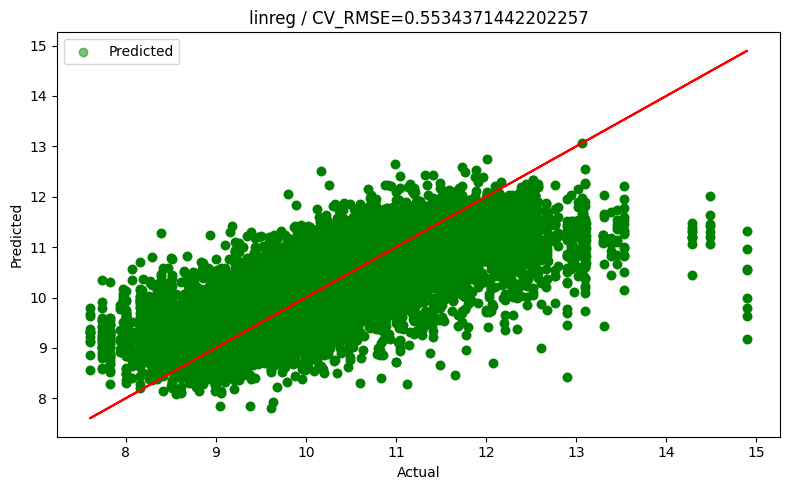

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LinearRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'fit_intercept': [True, False], 'positive': [False, True]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed

In [27]:
linreg_grid = {
    "fit_intercept": [True, False],
    "positive": [False, True]
}

run_gridsearch("linreg", LinearRegression(), linreg_grid)

the acuuracy R^2 from the tunned Linear regression is moderate with score 0.55. This means that there was moderate predictive error. The oulier impact was reduced, which resulted in moderate fitting of this model.

### GridSearchCV for k-NN.

n_neighbors controls how many neighbors influence the prediction. Using a small value of k gives low bias, resulting in high variance (overfitting), while a higher value of k gives high bias, resulting in low variance (underfitting).

weights: setting to "uniform" makes all neighbors equal, while setting to "distance" makes closer neighbors weigh more. 
distance reduces sensitivity to noise, which often improves generalization

p: defines distance metric which can either be p=1 "Manhattan", p=2 "Euclidean". Making use of [2] means i am using Eclidean which won't give best result as Manhattan will.

Fitting 3 folds for each of 4 candidates, totalling 12 fits


knn | RMSE=0.6148720188327726
params={'n_neighbors': 7, 'p': 2, 'weights': 'uniform'} 


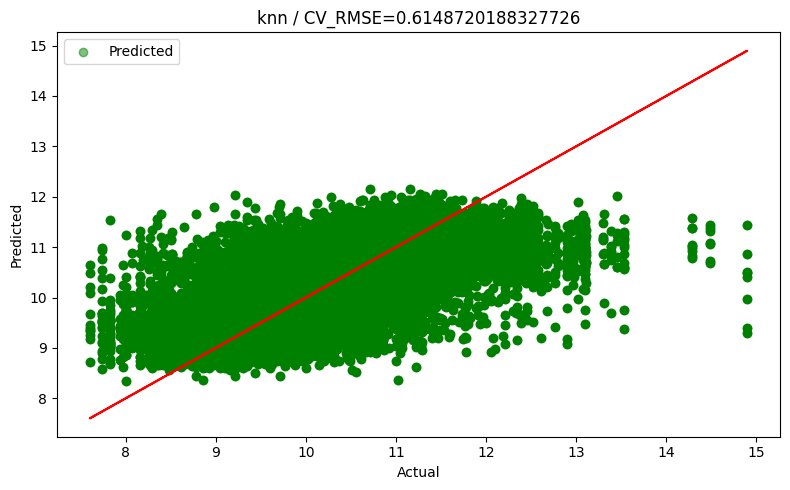

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': [3, 7], 'p': [2], 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate

In [28]:
knn_grid = {
    "n_neighbors": [3, 7],
    "weights": ["uniform", "distance"],
    "p": [2],
}

run_gridsearch("knn", KNeighborsRegressor(), knn_grid)

Even this prediction is better than the one from base model, there are still some significant errors escpecially for higher-priced cars.

### GridSearchCV for Decision Tree.

This grid adjusts tree complexity and pruning using the following hyperparameters: max_depth (None vs 10) controls how deep the tree can grow, min_samples_split (2 vs 10) and min_samples_leaf (1 vs 4) control how easily nodes split and how small leaves can be, and ccp_alpha (0.001 vs 0.01) controls pruning strength. These variables have a direct impact on generalization because they balance flexibility and regularization.

Fitting 3 folds for each of 16 candidates, totalling 48 fits


dt | RMSE=0.5399813103362926
params={'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2} 


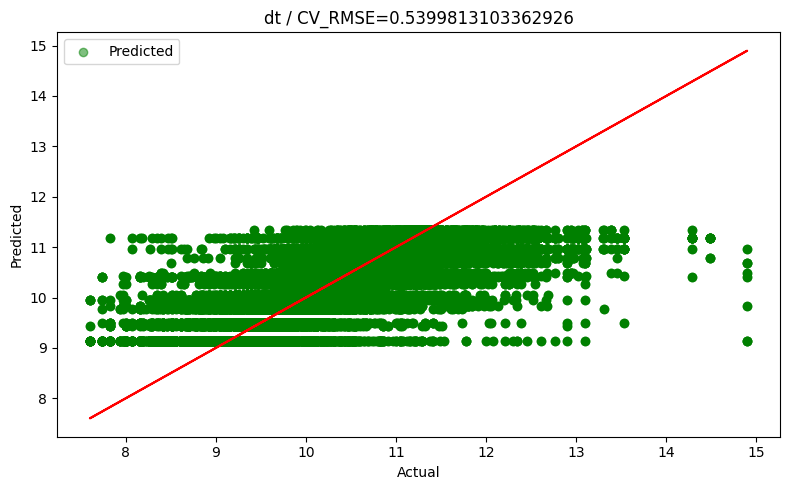

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'ccp_alpha': [0.001, 0.01], 'max_depth': [None, 10], 'min_samples_leaf': [1, 4], 'min_samples_split': [2, 10]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computatio

In [29]:
dt_grid = {
    "max_depth": [None, 10],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 4],
    "ccp_alpha": [ 0.001, 0.01]
}

run_gridsearch("dt", DecisionTreeRegressor(), dt_grid)


From this plot, it was noticed that the there was limited set of price estimates, for expensive cars there is no certainty of it to predict the right right.

### GridSearchCv for Random Forest:

RandomForest is toggle between different samples and replacements for best parameters using: n_estimators (200) controls ensemble size, max_depth (10 vs 20) and min_samples_split (5 vs 10) / min_samples_leaf (1 vs 2) control tree size/regularization, max_features ("sqrt" vs "log2") sets how many features are tried per split, and bootstrap (True vs False).

Fitting 3 folds for each of 8 candidates, totalling 24 fits


rf | RMSE=0.6154733408000391
params={'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200} 


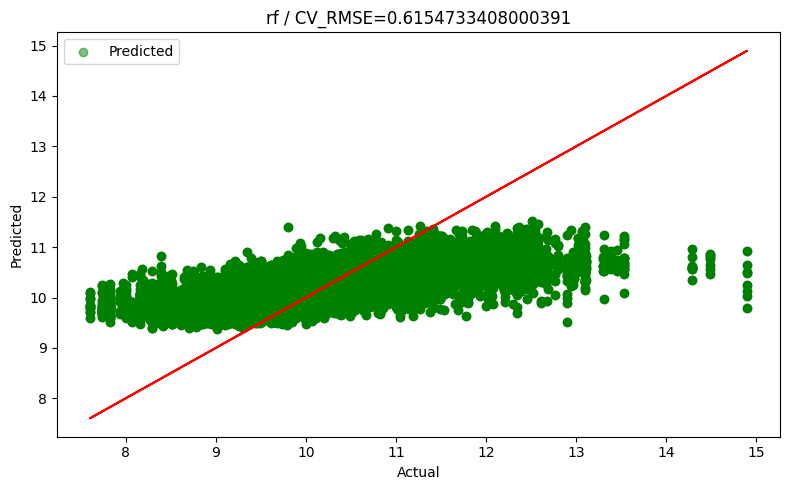

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'bootstrap': [True], 'max_depth': [10, 20], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time f

In [30]:
rf_grid = {
    "n_estimators": [200],
    "max_depth": [10, 20],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
    "bootstrap": [True]
}
run_gridsearch("rf", RandomForestRegressor(), rf_grid)

This model shows a substantial residual variance, it gives  a moderate accuracy whic is a litlle better than the k-NN model. 

**Builds and displays the sorted grid-search results table.**

In [31]:
results_df = pd.DataFrame(results).sort_values("rmse")
results_df


,model,rmse,params
2,dt,0.539981,"{'ccp_alpha': 0.001, 'max_depth': None, 'min_s..."
0,linreg,0.553437,"{'fit_intercept': True, 'positive': False}"
1,knn,0.614872,"{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}"
3,rf,0.615473,"{'bootstrap': True, 'max_depth': 20, 'max_feat..."


From the plot of various tuned models above and the hyperparameters used with grid search, the decision tree and linear regression perform competitively i.e with not much difference, while Random Forest remains robust and gives better prediction that others. The selected model balances performance and generalization.

# Conclusion

RandomForest performs better than other models used in this project, k-NN is a little bit close though. This significant improvement in the models result came from feature enginering (Log transform due to the skewness of the target columns) also from hyperparameters tunning with GridSearchCV which combines many values to give the best generalized results.

https://github.com/MLnDATASCIENCE/Used_car_prices_prediction_ML_training_subproject_1


**Kaggle Submission File Generation**

Generates submission predictions from the best model and saves submission.csv.

In [32]:
# 1. Select model, predict, inverse transform, and clip negative values
best = best_models[results_df.iloc[3]['model']]
preds = (np.exp(best.predict(df_test_encoded)) - delta).clip(min=0)

# 2. Create DataFrame and save to CSV
pd.DataFrame({'id': df_test['id'], 'price': preds}).to_csv('submission.csv', index=False)

kaggle position

![alt text](myposition.PNG)